In [1]:

import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

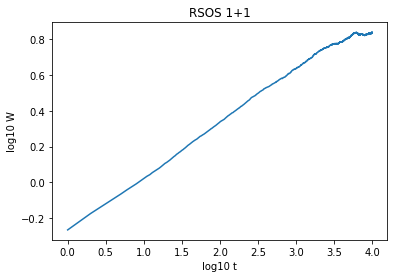

In [2]:
#计算RSOS的early-time-exponent
L = 512        #模拟尺寸
T = 10000         #模拟时间
re = 100       #重复次数
W = np.zeros(T) #粗糙度
A=ffgn(0,T)     #长程关联噪声
S=1
from random import randrange

for times in range(re):
    h = np.zeros(L+2, dtype=int)#上一时刻
    h1 = h
    w = np.array([])
    for t in range(T):
        h[0]=h[L]
        h[L+1]=h[1]
        for i in range(1,L+1):      #按层沉积
            a = rd.randint(0,1)
            j = randrange(1,L+1)        # Select a random site
            if ((np.fabs(h[j] - h[(j-1)]) <= S) and (np.fabs((h[j] + 1) - h[(j+1)]) <= S)):
                    h1[j] += a
        h = h1
        wt = np.std(h1)
        w = np.append(w, wt)
    W=W+w
        
W = W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)

plt.plot (xlog, ylog,label='original data')
plt.title('RSOS 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()

In [9]:
xlog1=xlog[10:450]
ylog1=ylog[10:450]

β = 0.3177990484348136


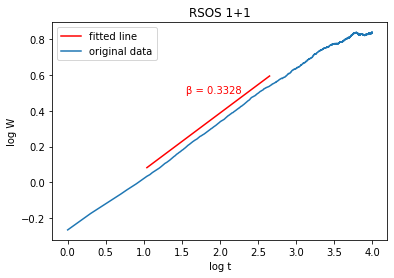

In [13]:
res = stats.linregress(xlog1, ylog1)
x=np.array(xlog1)
plt.plot(x, res.intercept + res.slope*x+0.05, color='r', label='fitted line',)
plt.annotate("β = 0.3328",xy=(1.,0.5),color='r')
print('β =',res.slope)        
plt.plot (xlog, ylog,label='original data')
plt.title('RSOS 1+1')  

plt.ylabel("log W")
plt.xlabel("log t")
plt.legend()
    

In [5]:
#对高度和粗糙度进行归一化
h1=(h-np.mean(h))/np.std(h)
h1_pdf=stats.norm.pdf(h1,loc=np.mean(h1), scale=np.std(h1))

W1=(W-np.mean(W))/np.std(W)
W1_pdf=stats.norm.pdf(W1,loc=np.mean(W1), scale=np.std(W))

In [11]:
# Create a list or array with your data points 
data = 
# Calculate the skewness 
skew = np.mean((data - np.mean(data)/np.std(data))**3)
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data)/np.std(data))**4)
print(skew,kurt)

0.2219341445016445 3.2619560236147676


In [20]:
from TracyWidom import TracyWidom
x = np.linspace(-10,10,L)
x1 = np.linspace(-10, 7.2, L)
x2 = np.linspace(-10, 6.3, L)
x4 = np.linspace(-10, 5.3, L)
tw1 = TracyWidom(beta=1)  # allowed beta values are 1, 2, and 4
tw2 = TracyWidom(beta=2)
tw4 = TracyWidom(beta=4)
pdf1 = tw1.pdf(x1)
pdf2 = tw2.pdf(x2)
pdf4 = tw4.pdf(x4)


r = np.random.rand(1000)
tw1_sample = tw1.cdfinv(r)
#对粗糙度归一
pdf1_1=(pdf1-np.mean(pdf1))/np.std(pdf1)
pdf2_2=(pdf2-np.mean(pdf2))/np.std(pdf2)
pdf4_4=(pdf4-np.mean(pdf4))/np.std(pdf4)


/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


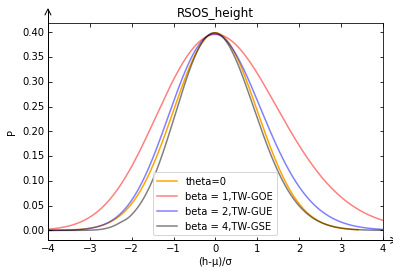

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist


fig = plt.figure()

# 不想要Demo中的这个样式，实验结果是去掉了灰色网格背景
#plt.style.use('ggplot')

# 创建一个绘图区对象，用于调整坐标轴
ax = axisartist.Subplot(fig,111)
# 添加绘图区对象到画布中，这里没报错很神奇，不理解，无限套娃？
fig.add_axes(ax)
# 坐标轴加上方向箭头
ax.axis["bottom"].set_axisline_style("->", size = 1.5)
ax.axis["left"].set_axisline_style("->", size = 1.5)

# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
## 其中 rn1 是输入数据，是一个list或一个np的narray对象；
## hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
## kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
## fit=stats.norm，拟合模型，一般是正态分布，norm/stats.norm都可以，可以添加fit_kws={}进行消息设置，
### fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
plot=sns.distplot(h1,hist=False,kde=False, fit=stats.norm, fit_kws={'color':'orange', 'label':'theta=0','linestyle':'-'})
plt.plot(x,pdf1*1.24, color = "red", alpha = 0.5, label=r"beta = 1,TW-GOE")
plt.plot(x,pdf2*0.89, color = "blue", alpha = 0.5, label=r"beta = 2,TW-GUE")
plt.plot(x,pdf4*0.717, color = "black", alpha = 0.5, label=r"beta = 4,TW-GSE")
plt.title('RSOS_height')  
plt.xlim(-4,4)
plt.ylabel("P")
plt.xlabel("(h-μ)/σ")
plt.legend()
plt.show()

In [77]:
import pandas as pd
s = pd.Series(-W1_pdf)
print(s.skew())#偏度计算
print(s.kurt())#峰度计算

0.8986459906223209
0.1741537221459084


In [ ]:
rsos_s=(1.059,0.964,0.832,1.472,1.189, 0.821)
rsos_k=(1.071,0.398,0.053,1.485,0.898, 0.559)

In [2]:

import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

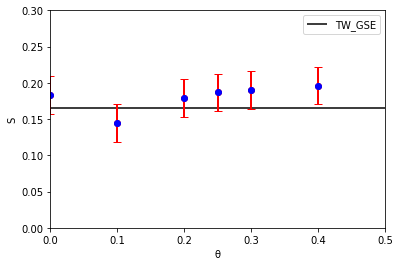

In [99]:
θ=(0,0.1,0.2,0.25,0.3,0.4)
rsos_s=(0.1836,0.1443,0.1788,0.1869,0.1899,0.1961)
plt.scatter(θ,rsos_s,c='r')
plt.ylim(0,0.3)
plt.xlim(0,0.5)
ds=np.random.uniform(low=-0.05,high=0.05)
plt.hlines(0.1655, 0, 0.5,color="black",label="TW_GSE")#TW-GSE分布偏度
plt.errorbar(θ,rsos_s,yerr=ds,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.ylabel('S')
plt.xlabel('θ')

plt.legend()
plt.show()

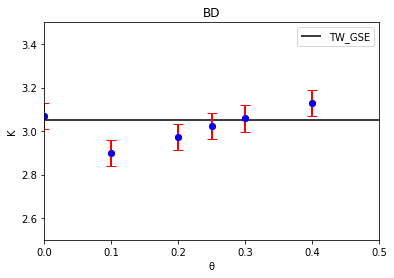

In [65]:
rsos_k=(3.071,2.898,2.9713,3.025,3.058,3.129)
plt.scatter(θ,rsos_k,c='r')
plt.hlines(3.0492, 0, 0.5,color="black",label="TW_GSE")#TW-GSE分布峰度
ds=np.random.uniform(low=-0.05,high=0.1)
plt.errorbar(θ,rsos_k,yerr=ds,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=5)
plt.ylim(2.5,3.5)
plt.xlim(0,0.5)
plt.ylabel('K')
plt.xlabel('θ')
plt.title("BD")
plt.legend()
plt.show()

In [5]:
#计算RSOS分布
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist

# python里的很多包会自作聪明的帮你加载各种样式，因此先整个新的画布
fig = plt.figure()

# 不想要Demo中的这个样式，实验结果是去掉了灰色网格背景
#plt.style.use('ggplot')

# 创建一个绘图区对象，用于调整坐标轴
ax = axisartist.Subplot(fig,111)
# 添加绘图区对象到画布中，这里没报错很神奇，不理解，无限套娃？
fig.add_axes(ax)
# 坐标轴加上方向箭头，Mission4 Get！
ax.axis["bottom"].set_axisline_style("->", size = 1.5)
ax.axis["left"].set_axisline_style("->", size = 1.5)
if W[i]==
lgW=np.log10(W)
# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
## 其中 rn1 是输入数据，是一个list或一个np的narray对象；
## hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
## kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
## fit=stats.norm，拟合模型，一般是正态分布，norm/stats.norm都可以，可以添加fit_kws={}进行消息设置，
### fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
plot=sns.distplot(lgW,kde=False, fit=stats.norm, fit_kws={'color':'black', 'label':'theta=0','linestyle':'-'})
plt.title('RSOS θ = 0')  
plt.ylabel("P")
plt.xlabel("lgW")
plt.show()

SyntaxError: invalid syntax (<ipython-input-5-91445561dbee>, line 22)

In [15]:
s = pd.Series(W)
print(s.skew())#偏度计算
print(s.kurt())#峰度计算

-1.1572208021462569
1.44751075458985


In [13]:
j=0
for i in range(t):
    if et[i]==0:
        j += 1
j/t

0.497528076171875

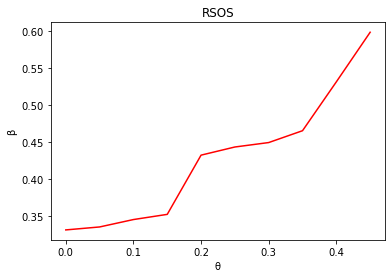

In [35]:
a=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
b=[0.331,0.335,0.345,0.352,0.432,0.443,0.449,0.465,0.531,0.598]
β=b
θ=a
plt.plot(a,b,'r')
plt.title('RSOS')  
plt.ylabel('β')
plt.xlabel('θ')
plt.show()

In [ ]:
for times in range(re):
    h = np.zeros(L, dtype=int)
    w = np.array([])
    for time in range(t):
        i = rd.randint(0, L-1)
        if 0<i<L-1:
            if ((math.fabs(h[i % L] - h[(i-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[(i+1) % L]) <= S)):
                h[i % L] += FFGN()
        if i==0:
            if ((math.fabs(h[i % L] - h[(L-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[(i+1) % L]) <= S)):
                h[i % L] += FFGN()
        if i==L-1:
            if ((math.fabs(h[i % L] - h[(i-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[0 % L]) <= S)):
                h[i % L] += FFGN()
        wt = np.std(h)
        w = np.append(w, wt)
    W += w
    
W = W/re

xlog = np.log10 (np.arange(1, t+1))
ylog = np.log10 (W)
i=0
while i<15:
    res = stats.linregress(xlog[2**i:2**(i+1)],ylog[2**i:2**(i+1)])
    plt.scatter(i, res.slope, c= 'red')
    i += 1

plt.title('RSOS 1+1')  
plt.ylabel("β")
plt.xlabel("t=2^i, i")
plt.show()



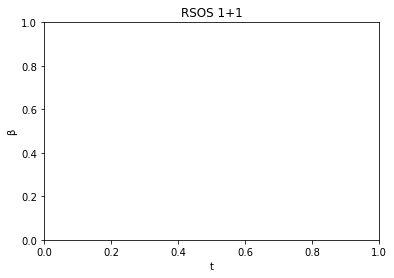

In [11]:
for times in range(re):
    h = np.zeros(L, dtype=int)
    w = np.array([])
    for time in range(t):
        i = rd.randint(0, L-1)
        if 0<i<L-1:
            if ((math.fabs(h[i % L] - h[(i-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[(i+1) % L]) <= S)):
                h[i % L] += 1
        if i==0:
            if ((math.fabs(h[i % L] - h[(L-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[(i+1) % L]) <= S)):
                h[i % L] += 1
        if i==L-1:
            if ((math.fabs(h[i % L] - h[(i-1) % L]) <= S) and (math.fabs((h[i % L] + 1) - h[0 % L]) <= S)):
                h[i % L] += 1
        wt = np.std(h)
        w = np.append(w, wt)
    W += w
    
W = W/re

xlog = np.log10 (np.arange(1, t+1))
ylog = np.log10 (W)
i=0
while 100<i<t:
    res = stats.linregress(xlog[i:i+100],ylog[i:i+100])
    plt.scatter(i, res.slope, c= 'red')
    i += 100

plt.title('RSOS 1+1')  
plt.ylabel("β")
plt.xlabel("t")
plt.show()



In [2]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et